In [2]:
import poker_game as pg
import matplotlib.pyplot as plt
import bot_players as bots
from scipy.stats import chisquare, shapiro
# import numpy as np
from random import choice 

In [4]:
player_names = ["Jarda", "OuJej", "Pedro", "Hordis", "Janza", "Byte"]
number_of_players = 6

color_set = ['#072475', '#13563B', '#A46928', '#E4A700', '#C70000', '#7B1414', 'black']
colors = dict((player_names[i], color_set[i % len(color_set)]) for i in range(number_of_players))
thresholds = [(0, 0.8, 1.0),(0, 0.9, 1.0),(0, 0.8, 1.0),(0, 0.9, 1.0)]
indifferent_players = 3
start_money = 200
N = 1000
wins = dict((player, 0) for player in player_names[:number_of_players])
game_lengths = []
histories = []
for i in range(N):
    game = pg.PokerGame()
    players = [bots.PreFlopBot(game, player_names[i], start_money) for i in range(indifferent_players)]
    players += [bots.NoobBot(game, player_names[i], start_money) for i in range(indifferent_players, number_of_players)]
    game.initialise_players(players)
    game.start_game()
    winner = game.winners[0]
    history = game.history
    histories.append(history)
    game_lengths.append(len(history[winner]))
    wins[winner.name] += 1
print(wins)

{'Jarda': 173, 'OuJej': 188, 'Pedro': 206, 'Hordis': 166, 'Janza': 136, 'Byte': 131}


Chi-Squared statistic: 25.532 
p-value: 0.00010995426121980288


<BarContainer object of 6 artists>

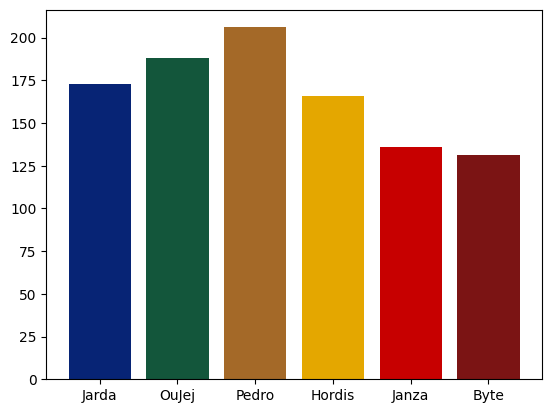

In [5]:
# x = list(map(str, thresholds))
chi2, p = chisquare(list(wins.values()), number_of_players*[N/number_of_players])
print("Chi-Squared statistic:", chi2, "\np-value:", p)
plt.bar(wins.keys(), wins.values(), color = colors.values())

<Axes: title={'center': 'Bot Game'}, xlabel='Hand', ylabel='Stack'>

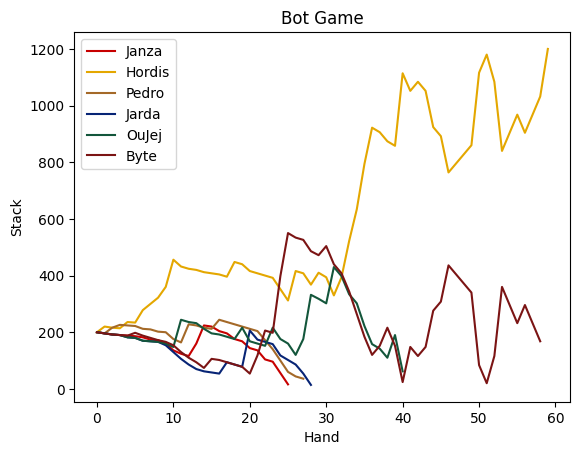

In [6]:
fig, ax = plt.subplots()
for key, value in choice(histories).items():
    ax.plot(value, label = key.name, color = colors[key.name])

ax.set_xlabel('Hand')
ax.set_ylabel('Stack')
ax.set_title('Bot Game')
ax.legend()
ax

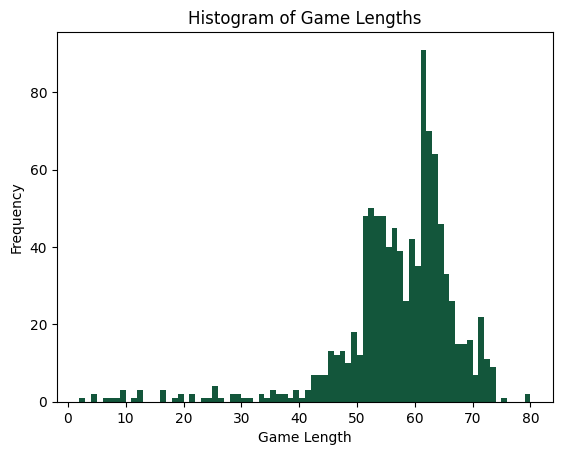

In [7]:
plt.hist(game_lengths, color=color_set[1], bins=max(game_lengths)-min(game_lengths))
plt.xlabel('Game Length')
plt.ylabel('Frequency')
plt.title('Histogram of Game Lengths')
plt.show()

In [8]:
_, p = shapiro(game_lengths)
print(p)

2.7282432047927265e-30
